# <font color=forestgreen><center><b>BINARY SENTIMENT ANALYSIS</b></center></font><br><br>

## <font color=olivedrab>Table of contents:</font><br>
- [Sentiment analysis](##Sentiment-analysis)
- [Text pre-processing](##Text%pre-processing)
 * [Removing HTML tags and URLs](###Removing-HTML-tags-and-URLs)
 * [Tokenization](###Tokenization)
 * [Removing stop words](###Removing-stop-words)
 * [Removing numbers](###Removing-numbers)
 * [Lemmatization/Stemming](###Lemmatization/Stemming)
 * [Sentiment Intensity Analyzer](###Sentiment-Intensity-Analyzer)
 * [Frequency distribution](###Frequency-distribution)
- [Conclusion](##Conclusion)
- [Sources](##Sources)
<br><br>




<center><img src="https://image.slidesharecdn.com/luccasummerschooltextmininghandouts-121112082043-phpapp02/95/text-and-text-stream-mining-tutorial-8-638.jpg?cb=1352708688" style="border: 1px solid green;"></center><br><br>

## <center><font color=seagreen>Sentiment analysis</font></center><br>

   It is believed that the process of classification constitutes the core of human and artificial intelligence and is considered essential when it comes to tasks that concern processing linguistic data. With such an expansion of social media and users’ input into the Web, it is possible to make use of a massive amount of unstructured data. Thanks to the constantly developing technology, we can extract the most significant information contained in the text. The phenomena of computational study of people’s opinions towards products or services is known under the name of sentiment analysis or opinion mining. 

The positive and useful results of this operation are indubitable. With such information, companies are able to better understand a client’s attitude and, as a result, to plan upgraded strategies in order to meet the expectations. Not only can the businesses monitor the opinion, but also they might control what kind of information a potential client will acknowledge.  

However, the task of sentiment analysis is fairly challenging as there are various issues concerning both technical and semantic aspects. The simplest method of analysing the sentiment is a binary classification task in which classes are positive and negative, however we must realise that human thoughts are structured and more complex, thus while classifying <extended> utterances, this method will hardly reflect a full image of an actual sentiment. Moreover, it is possible that the classifiers’ actions might result in representational harms caused by replicated biases in training data, prejudicially applied labels, partial data resources or by the algorithm itself. <a href="https://web.stanford.edu/~jurafsky/slp3/old_oct19/4.pdf">(Jurafsky, D., Martin, J. H.)</a> As for technicalities of automated opinion mining, irony, sarcasm and the context are very difficult to be taken under consideration. What’s more, dealing with negation while analysing sentiments can cause various difficulties as we often need context to determine whether a phrase is negative or positive. 

## <center><font color=seagreen>Text pre-processing</font></center><br>

In [30]:
url = "https://www.gutenberg.org/files/2527/2527-h/2527-h.htm"

To establish the value of sentiment in a given text, pre-processing of the text is required. It is essential to remove all the redundant element from the text as they might have the negative impact on the result. This operation includes:
 - removing HTML tags
 - tagging
 - parsing
 - lemmatization 
 - removing numbers
 -  removing extraspaces 
 
 
It is possible to execute additional cleaning operations in order to achieve the highest quality of data to process.

### tokenization

In [31]:
import requests
book = requests.get(url)

In [48]:
html = book.text
#print(html)

One of the most common tools used to creating programs for natural language analysis is Python with its' built-in NLTK library:
"<i>It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries</i>". <a href="https://www.nltk.org/">(NLTK 3.6.2 Documentation)</a>
<br><br>
In this essay, we will use several libraries of NLTK. Firstly, we are going to use BeautifulSoup which is a package for parsing HTML documents. It is an essential first step while cleaning the text downloaded from a website.
<br><br>
### <center><font color=darkseagreen>Removing HTML tags and URLs</font></center><br>

In [49]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, "html.parser")
#print(soup)

<br>
HTML tags and URLs are strictly linked to the text obtained from any website. HTML tags will only determine the way in which a web browser will display the content and URLs, apart from location on the web, do not provide any valuable information. Since we focus on the meaningful words, it is necessary to remove all the tags and links from the text by writing a regular expression which should match all words and strings starting with "http".
<br><br>

In [50]:
stripped_text = soup.get_text(separator=" ")
#print(stripped_text)

In [51]:
import re

def remove_url(text_data):
    return re.sub(r"http\S+", "", text_data)

processed_text = remove_url(stripped_text)

### <center><font color=darkseagreen>Tokenization</font></center><br>
Next essential step in pre-proccesing text for NLP purposes is tokenization. It’s a process during which a text is splitted into single units (words,numbers,punctuation marks), called tokens. These units are created by establishing and extracting the content from between the word boundaries.
<br><br>
This step allows us to count the amount of particular tokens or number of words in the text. Furthermore, it is possible to count the frequency of words and tokens.
<br><br>

In [52]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(processed_text)

Because the elements of a stop_word list are stored in the lower case, it is important to convert the text before elimination of redundant words.

In [53]:
tokens = [token.lower() for token in tokens]

### <center><font color=darkseagreen>Removing stop words</font></center><br>
Other words that do not add much information to the text are stop words. These are the most common words in the text (articles, pronouns, prepositions, etc.) and can be noticed as words with the highest frequency in the corpora. NLTK provides us with a list of stopwords in 16 different languages.<br><br>

However, even if it seems that the removal of stop words will enhance the valuable processing time, some researchers head towards a different approach. According to them, each word may be considered a stop word, depending on the research question: "<i>Problems like sentiment analysis are much more sensitive to stop words removal than document classification.</i>" <a href="https://medium.com/@limavallantin/why-is-removing-stop-words-not-always-a-good-idea-c8d35bd77214">(Vallantin, L.)</a> e.g. With 'not' removed, the meaning of the resulting sentence will be completely opposite to the reality. <br><br>

In [54]:
import nltk
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [55]:
words_stop = []
for word in tokens:
    if word not in stop_words:
        words_stop.append(word)
        
#print(words_stop)

<br>
Relying on already existing resources not only facilitate the process of cleaning the data, but also lead to universal results. However, it might appear that some of them are inexhaustive, e.g. this stopword list does not contain popular and meaningless words such as "one" and "also", which affected the frequency distribution.
<br><br>

### <center><font color=darkseagreen>Removing numbers</font></center><br>
The next step towards making the data useful consists in removing non-alphanumeric characters from the text. 

In [56]:
words_final = [word for word in words_stop if word.isalpha()]
for word in words_stop:
        words_final.append(word)
        
#print(words_final)

### <center><font color=darkseagreen>Lemmatization/Stemming</font></center><br>
For some reasearch purposes, it is necessary to reduce tokens to the simplest form so that occur only once under the shared lemma (root) or to the context in which they occur. The aim is to take away inflectional suffixes and prefixes to bring out the word's dictionary form. "<i>Stemming uses the stem of the word while lemmatization, the context in which the word is being used</i>". This operation is indispensable when we search not only for the exact query but also for the different forms of it.<br>

In [41]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "teaching"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: teach
Stemmed Word: teach


### <center><font color=darkseagreen>Sentiment Intensity Analyzer</font></center><br>
After getting rid of the redundant components of the data, we are finally able to determine the emotional value. As previously mentionned, the values taken under the consideration are: positive, negative and neutral.
We will perform our task with a NLTK tool called SentimentAnalyzer.

In [57]:
def listToString(words_final): 
    str = " "  
    return (str.join(words_final))
        
  
#print(listToString(words_final)) 

list_to_text = listToString(words_final)

In [43]:
from nltk.sentiment import SentimentIntensityAnalyzer

score = SentimentIntensityAnalyzer()
score.polarity_scores(list_to_text)


{'neg': 0.153, 'neu': 0.609, 'pos': 0.238, 'compound': 1.0}

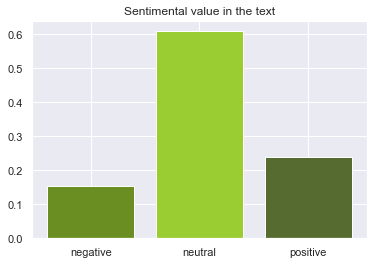

In [44]:
import matplotlib.pyplot as plt

left = [0,1,2]
hights = [0.153,0.609,0.238]
plt.title("Sentimental value in the text")
plt.grid(True)
plt.minorticks_on()
plt.xticks([0,1,2], ['negative','neutral','positive'])
plt.bar(left,hights,color=('olivedrab','yellowgreen','darkolivegreen'))
plt.show()

### <center><font color=darkseagreen>Frequency distribution</font></center><br>
Frequency distribution tells us the frequency of each item in the text, however we will mostly focus on pre-processed text and words that carry meaning. 

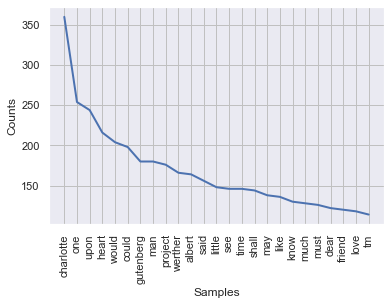

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

freqdist1 = nltk.FreqDist(words_final)
freqdist1.plot(25)

## <font color=seagreen>Conclusion</font><br>
Natural language processing is an interdisciplinary domain comprising linguistics and computer science. It seems impossible to excel the performance of artificial intelligence without translating human language into data comprehensible for machines. 
<br><br>
A basic task of computational linguists is to determine whether the expressed opinion in a text is positive, negative or neutral. Despite persistently improved methods and algorithms, this task remains a significant challenge for researchers. Therefore, with mindfully cleaned data, the desired results can be obtained. 


## <font color=seagreen>Sources</font><br>
1) Goethe, J. W., The Sorrows of Young Werther. https://www.gutenberg.org/files/2527/2527-h/2527-h.htm. Accessed 13 June 2021. <br>
2) Jurafsky, D., Martin, J. H., Speech and Language Processing. https://web.stanford.edu/~jurafsky/slp3/old_oct19/4.pdf Accessed 13 June 2021 <br>
3) Mgrcar. Text and Text Stream Mining Tutorial. https://www.slideshare.net/mgrcar/text-and-text-stream-mining-tutorial-15137759. Accessed 13 June 2021 <br>
4) Natural Language Toolkit — NLTK 3.6.2 Documentation. https://www.nltk.org/. Accessed 13 June 2021. <br>
5) Vallantin, L. “Why Is Removing Stop Words Not Always a Good Idea.” Medium, 15 June 2020, https://medium.com/@limavallantin/why-is-removing-stop-words-not-always-a-good-idea-c8d35bd77214. Accessed 13 June 2021<br>